<a href="https://colab.research.google.com/github/amanjaiswal777/ICCIT-Workshop/blob/main/01_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏡 House Price Prediction with Linear Regression
In this notebook, we'll build a simple machine learning model to predict house prices using synthetic data.

We will cover:
- Data generation
- Data exploration (EDA)
- Feature engineering
- Model training
- Predictions
- An assignment for you to practice 🎯

In [1]:

# 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


## 🔹 Step 1: Generate Synthetic Housing Data

In [2]:

# Generate reproducible synthetic dataset
np.random.seed(42)
n_samples = 500

house_size = np.random.normal(1500, 300, n_samples)  # in square feet
num_rooms = np.random.randint(2, 7, n_samples)
location_quality = np.random.choice([1, 2, 3], n_samples, p=[0.3, 0.5, 0.2])  # 1=low, 2=medium, 3=high

# Price = base + size * factor + rooms * factor + location premium + noise
base_price = 50000
price = (base_price +
         house_size * 120 +
         num_rooms * 10000 +
         location_quality * 20000 +
         np.random.normal(0, 20000, n_samples))

data = pd.DataFrame({
    "HouseSize": house_size,
    "NumRooms": num_rooms,
    "LocationQuality": location_quality,
    "Price": price
})

data.head()


,HouseSize,NumRooms,LocationQuality,Price
0,1649.014246,3,2,303513.564197
1,1458.520710,3,2,312920.972697
2,1694.306561,4,2,327417.793806
3,1956.908957,4,2,389783.916284
4,1429.753988,6,1,288100.666025


## 🔹 Step 2: Data Exploration

In [3]:

# Quick statistics
data.describe()


,HouseSize,NumRooms,LocationQuality,Price
count,500.000000,500.000000,500.000000,500.000000
mean,1502.051398,3.966000,1.908000,309738.421652
std,294.375974,1.422988,0.710313,45286.161824
min,527.619798,2.000000,1.000000,193618.023704
25%,1289.907779,3.000000,1.000000,280180.797665
50%,1503.839144,4.000000,2.000000,308685.917899
75%,1691.034976,5.000000,2.000000,340408.044654
max,2655.819447,6.000000,3.000000,490148.480410


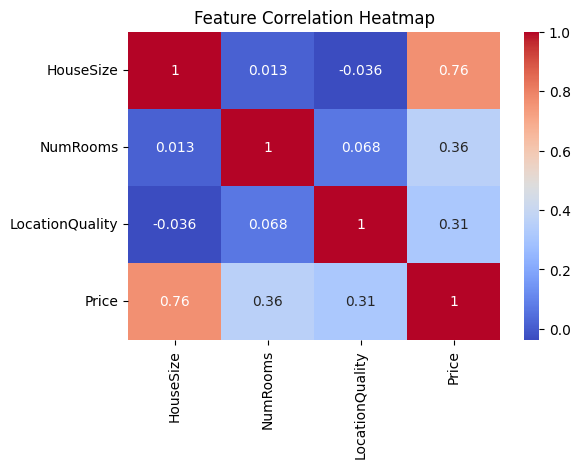

In [4]:

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


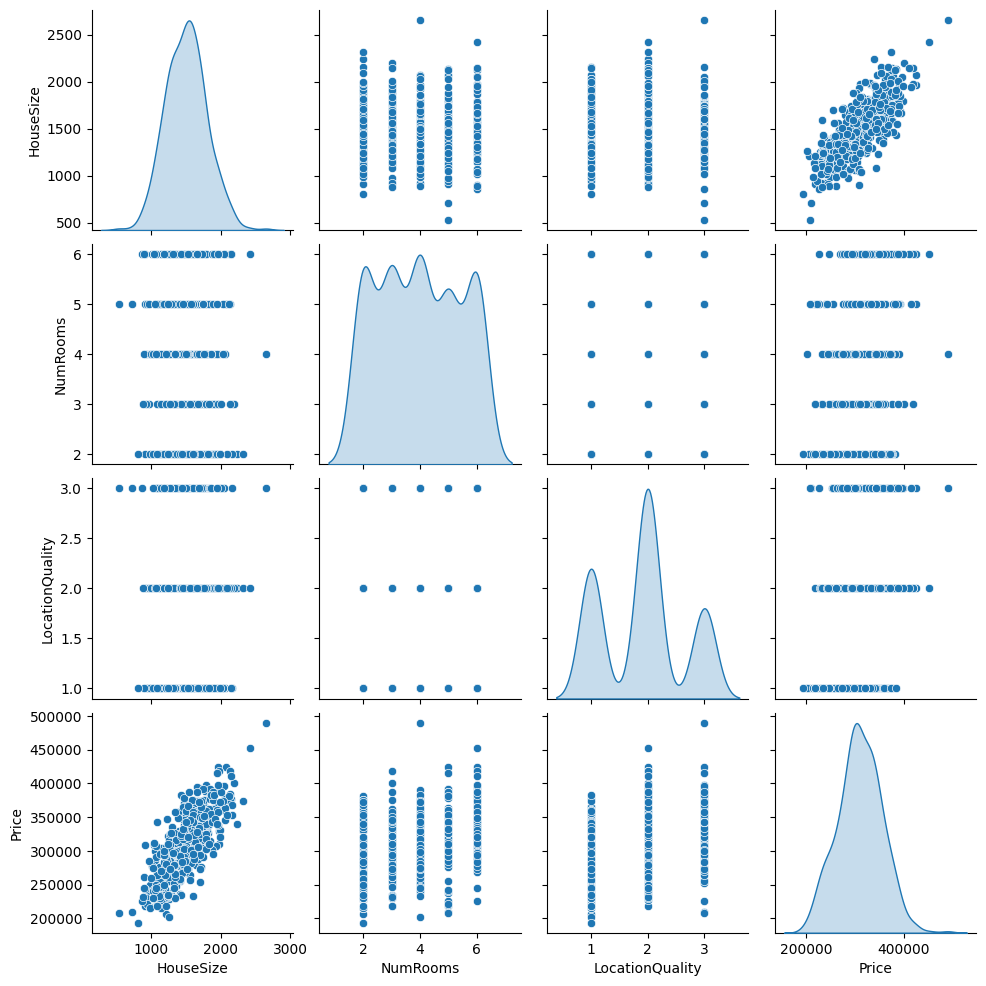

In [5]:

# Pairplot visualization
sns.pairplot(data, diag_kind="kde")
plt.show()


## 🔹 Step 3: Feature Engineering

In [6]:

# Features & Target
X = data.drop("Price", axis=1)
y = data["Price"]

# Standardize features (optional for Linear Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 🔹 Step 4: Train Linear Regression Model

In [7]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("✅ Model Trained!")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


✅ Model Trained!
R2 Score: 0.8249560066773202
RMSE: 18678.30497557066


## 🔹 Step 5: Make Predictions

In [8]:

# Example new house [size=1600 sq ft, 3 rooms, medium location=2]
new_house = np.array([[1600, 3, 2]])
new_house_scaled = scaler.transform(new_house)

predicted_price = model.predict(new_house_scaled)
print(f"Predicted Price for {new_house.tolist()[0]}: ${predicted_price[0]:,.2f}")


Predicted Price for [1600, 3, 2]: $314,366.60


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 🎯 Assignment
1. Try changing the train-test split ratio and observe how results vary.
2. Modify the `LinearRegression` model (e.g., fit_intercept=False) and see the effect.
3. Generate new houses with different features and predict their prices.

👉 Write your code below:

In [9]:

# 🚀 Your Turn: Experiment with parameters here
# Example: Try test_size=0.3 in train_test_split above

# TODO: Modify and run your experiments here


## ✅ Assignment Solution (Hidden)
Below is one possible solution (commented out). Uncomment and run to check.

In [11]:

# --- SOLUTION ---
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# model = LinearRegression(fit_intercept=False)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("R2 Score:", r2_score(y_test, y_pred))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


## Ideas for further exploration:

- **Explore other regression models**: Try using different models like Ridge, Lasso, Elastic Net, or even more complex models like Random Forest or Gradient Boosting.
- **Polynomial Features**: Create polynomial features (e.g., HouseSize^2) to capture non-linear relationships.
- **Interaction Terms**: Add interaction terms between features (e.g., HouseSize * NumRooms) to see if the combined effect is significant.
- **Categorical Feature Encoding**: If you had categorical features (like "Neighborhood"), you would need to encode them using techniques like one-hot encoding.
- **Cross-Validation**: Implement cross-validation to get a more robust evaluation of your model's performance.
- **Hyperparameter Tuning**: Use techniques like GridSearchCV or RandomizedSearchCV to find the best hyperparameters for your chosen model.
- **Residual Analysis**: Plot the residuals (the difference between actual and predicted prices) to check for patterns or heteroscedasticity.
- **Feature Importance**: For models that support it (like tree-based models), explore feature importance to understand which features contribute most to the predictions.
- **Visualize Predictions**: Plot the actual prices against the predicted prices to visually assess the model's performance.